In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

import matplotx
import numpy as np
import pandas as pd
from scipy.stats import sem
from gptchem.plotsettings import *

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [6]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count", sem]
)

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _va

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std", sem])

In [8]:
compiled_grouped_res

mae                            \
                                     mean       std count       sem   
representation num_train_points                                       
InChI          10                0.676240       NaN     1       NaN   
SELFIES        10                0.824770  0.209767     4  0.104884   
               20                0.768267  0.079081     3  0.045657   
               50                0.686653  0.040485     3  0.023374   
               100               0.650640  0.033231     3  0.019186   
               200               0.629980  0.008061     2  0.005700   
               1000              0.501720  0.043049     2  0.030440   
               5000              0.377120       NaN     1       NaN   
SMILES         10                1.387787  1.391065     6       NaN   
               20                0.752096  0.060821     5       NaN   
               50                0.679377  0.054183     7  0.020479   
               100               0.646864  0.015779     5  0.007056   
               200               0.593500  0.006511     4  0.003256   
               1000              0.472880  0.042233     4  0.021117   
               5000              0.460650  0.197381     4  0.098691   

                                  max_error                               \
                                       mean         std count        sem   
representation num_train_points                                            
InChI          10                  3.520000         NaN     1        NaN   
SELFIES        10                  3.185000    0.310000     4   0.155000   
               20                  3.320000    0.744782     3   0.430000   
               50                  3.100000    0.659621     3   0.380832   
               100                 3.636667    0.500833     3   0.289156   
               200                 3.900000    0.947523     2   0.670000   
               1000                1.900000    0.254558     2   0.180000   
               5000                1.380000         NaN     1        NaN   
SMILES         10                147.788333  353.339862     6        NaN   
               20                  3.430000    0.550681     5        NaN   
               50                  3.151429    0.829306     7   0.313448   
               100                 3.234000    0.203544     5   0.091027   
               200                 2.645000    0.487340     4   0.243670   
               1000                2.332500    0.609446     4   0.304723   
               5000               26.215000   49.397411     4  24.698705   

                                        mse                                
                                       mean          std count        sem  
representation num_train_points                                            
InChI          10                  0.736266          NaN     1        NaN  
SELFIES        10                  1.078488     0.499402     4   0.249701  
               20                  0.918837     0.138539     3   0.079986  
               50                  0.778944     0.107259     3   0.061926  
               100                 0.716050     0.090726     3   0.052381  
               200                 0.673287     0.031602     2   0.022346  
               1000                0.394306     0.071273     2   0.050398  
               5000                0.239338          NaN     1        NaN  
SMILES         10                504.559369  1233.186912     6        NaN  
               20                  0.946053     0.151064     5        NaN  
               50                  0.764131     0.110091     7   0.041610  
               100                 0.688629     0.039471     5   0.017652  
               200                 0.560064     0.028697     4   0.014348  
               1000                0.383231     0.083849     4   0.041924  
               5000               10.278554    20.121321     4  10.060660

/Users/kevinmaikjablonka/git/kjappelbaum/plotutils/plotutils.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - pad * (x_max - x_min), x_max + pad * (x_max - x_min))


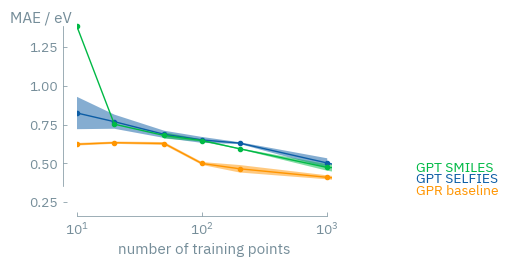

In [22]:

fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc["SELFIES", :].index,
    compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"],
    label="GPT SELFIES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["SELFIES", :].index,
    compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
    - compiled_grouped_res.loc["SELFIES", :]["mae"]["sem"],
    compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
    + compiled_grouped_res.loc["SELFIES", :]["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_grouped_res.loc["SMILES", :].index,
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"],
    label="GPT SMILES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["SMILES", :].index,
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    - compiled_grouped_res.loc["SMILES", :]["mae"]["sem"],
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    + compiled_grouped_res.loc["SMILES", :]["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped["mae"]["mean"],
    label="GPR baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["sem"],
    compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["sem"],
    alpha=0.5,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
matplotx.ylabel_top("MAE / eV")
ax.set_xscale("log")

range_frame(
    ax,
    np.array([10, 1000]),
    np.stack([ compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["sem"] ,   compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]])
)
fig.savefig("bandgap_regression_res.pdf", bbox_inches="tight")